# Binary

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"


## Preparando os dados

In [ ]:
# multi-hot encode
import numpy as np

def multi_hot_encode(sequences, num_classes):
  results = np.zeros((len(sequences), num_classes))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.0
  return results

x_train = multi_hot_encode(train_data, num_classes=10000)
x_test = multi_hot_encode(test_data, num_classes=10000)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")


## Construindo o modelo

In [ ]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

## Validando a abordagem

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6841 - loss: 0.6263 - val_accuracy: 0.8604 - val_loss: 0.4170
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8922 - loss: 0.3457 - val_accuracy: 0.8852 - val_loss: 0.3076
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9261 - loss: 0.2313 - val_accuracy: 0.8918 - val_loss: 0.2790
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9497 - loss: 0.1666 - val_accuracy: 0.8882 - val_loss: 0.2780
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9643 - loss: 0.1269 - val_accuracy: 0.8882 - val_loss: 0.2863
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9752 - loss: 0.1023 - val_accuracy: 0.8840 - val_loss: 0.3017
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9819 - loss: 0.0827 - val_accuracy: 0.8822 - val_loss: 0.3216
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9872 - loss: 0.0654 - val_accuracy: 0.8791 - v

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9999 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9997 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9999 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9998 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9997 - val_loss: 0.0055
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9997 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

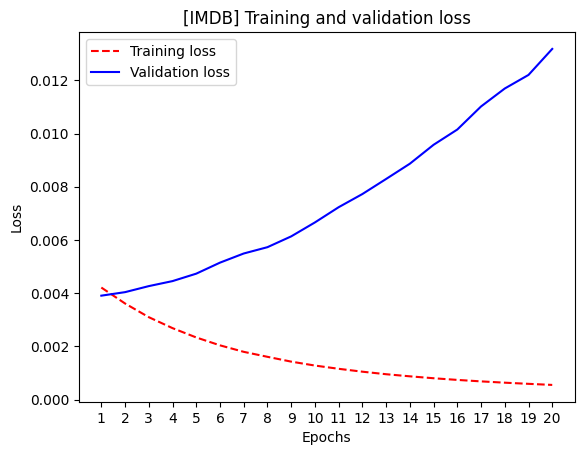

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
# "r--" is for "dashed red line."
plt.plot(epochs, loss_values, "r--", label="Training loss")
# "b" is for "solid blue line."
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

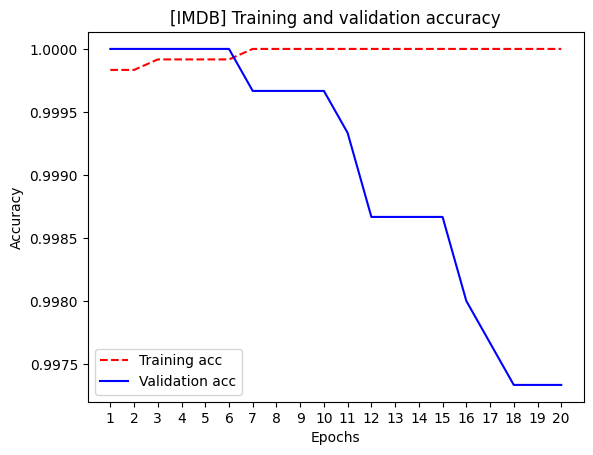

In [ ]:
# Clears the figure
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Treinando um novo modelo do zero por quatro épocas e então avaliá-lo nos dados de teste.

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7321 - loss: 0.5827
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9108 - loss: 0.2643
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9363 - loss: 0.1851
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9513 - loss: 0.1506
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8813 - loss: 0.3024


In [ ]:
results

[0.301992803812027, 0.8831599950790405]

## Usando um modelo treinado para gerar previsões em novos dados

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.18030092],
       [0.99990696],
       [0.7381352 ],
       ...,
       [0.07514027],
       [0.04852851],
       [0.7902705 ]], dtype=float32)

# Classificando notícias: Um exemplo de classificação multiclasse

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    # The indices are offset by 3 because 0, 1, and 2 are reserved
    # indices for "padding," "start of sequence," and "unknown."
    [reverse_word_index.get(i - 3, "?") for i in train_data[10]]
)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_labels[10]

np.int64(3)

## Preparando os dados

você pode vetorizar os dados com o mesmo código exato do exemplo anterior.

In [ ]:
x_train = multi_hot_encode(train_data, num_classes=10000)

x_test = multi_hot_encode(test_data, num_classes=10000)


Para vetorizar os rótulos usamos one-hot

In [ ]:
def one_hot_encode(labels, num_classes=46):
    results = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results


y_train = one_hot_encode(train_labels)

y_test = one_hot_encode(test_labels)

In [ ]:
# Há uma maneira embutida de fazer isso no keras:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Construindo seu modelo

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

In [ ]:
top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(
    k=3, name="top_3_accuracy"
)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy", top_3_accuracy],
)

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.2621 - loss: 3.5277 - top_3_accuracy: 0.4392 - val_accuracy: 0.5720 - val_loss: 2.4249 - val_top_3_accuracy: 0.6530
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6136 - loss: 2.0881 - top_3_accuracy: 0.7104 - val_accuracy: 0.6690 - val_loss: 1.6296 - val_top_3_accuracy: 0.7640
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7112 - loss: 1.4176 - top_3_accuracy: 0.7882 - val_accuracy: 0.7210 - val_loss: 1.2864 - val_top_3_accuracy: 0.8180
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7652 - loss: 1.0812 - top_3_accuracy: 0.8556 - val_accuracy: 0.7580 - val_loss: 1.1267 - val_top_3_accuracy: 0.8500
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8205 - loss: 0.8197 - top_3_accuracy: 0.8954 - val_accuracy: 0.7820 - val_loss: 1.0219 - val_top_3_accuracy: 0.8820
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8638 - loss: 0.6509 - top_3_ac

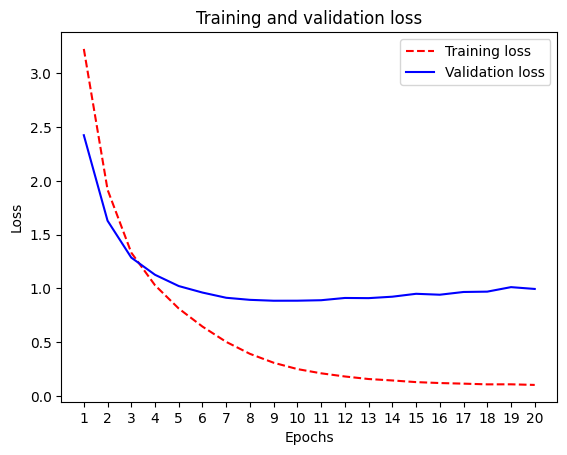

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

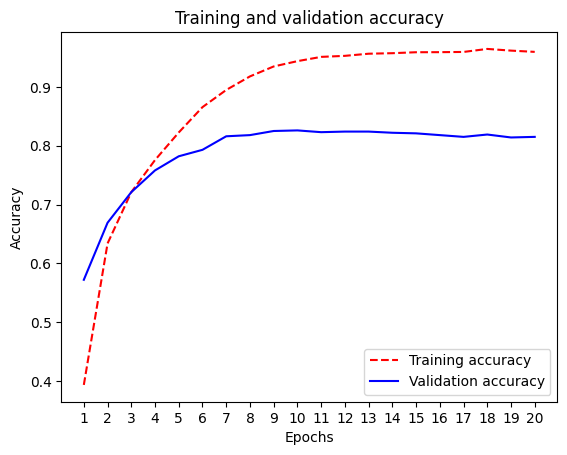

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

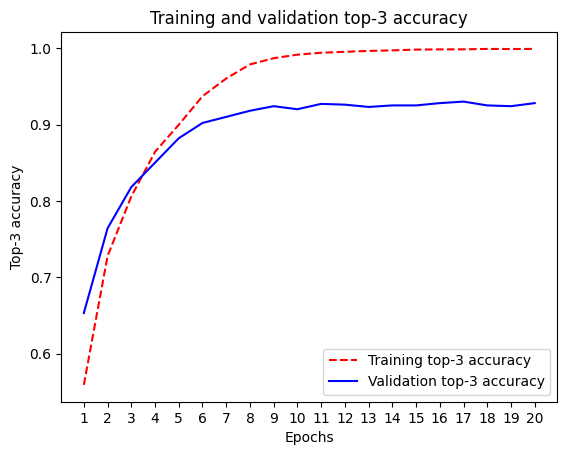

In [ ]:
plt.clf()
acc = history.history["top_3_accuracy"]
val_acc = history.history["val_top_3_accuracy"]
plt.plot(epochs, acc, "r--", label="Training top-3 accuracy")
plt.plot(epochs, val_acc, "b", label="Validation top-3 accuracy")
plt.title("Training and validation top-3 accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Top-3 accuracy")
plt.legend()
plt.show()

O modelo começa a overfitar após nove épocas. Vamos treinar um novo modelo do zero por nove épocas e depois avaliá-lo no conjunto de teste.

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512,
)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3560 - loss: 3.5151
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5585 - loss: 2.1006
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6849 - loss: 1.4537
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7576 - loss: 1.1252
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8140 - loss: 0.8826
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8562 - loss: 0.6922
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8896 - loss: 0.5252
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9206 - loss: 0.3872
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9348 - loss: 0.3133
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8076 - loss: 0.8917


In [ ]:
results

[0.9173082709312439, 0.8005343079566956]

Qual seria a precisão de uma linha de base aleatória? Poderíamos tentar implementar rapidamente uma para verificar empiricamente:

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels == test_labels_copy)
hits_array.mean()

np.float64(0.19412288512911843)

## Gerando previsões em novos dados

In [ ]:
predictions = model.predict(x_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

np.float32(1.0000001)

In [ ]:
np.argmax(predictions[0])

np.int64(3)